<a href="https://colab.research.google.com/github/rayanecardozo/machine-learning-studies/blob/main/04_Regress%C3%A3o_Multivariadas_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de Regressão Para Prever a Variável Peso (kg)

## Pré-processamento dos Dados

In [ ]:
# Importação de bibliotecas e pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from scipy import stats

In [ ]:
# Carregando e lendo o arquivo
df = pd.read_csv('dados_peso.csv')
df

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,20242510284,50.0,177.0,M,91,7,4.0,45.0,1.0,12.0,2,4.0,4.0,Vila Velha
1,20242510285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20242510286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20242510287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20242510288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,20242510473,26.0,179.0,M,100,6.5,5.0,60.0,1.0,8.0,2,2.0,4.0,Viana
184,20242510322,37.0,179.0,M,76,7,3.0,40.0,1.0,10.0,1.5,3.0,4.0,Colatina
185,20242510474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,20242510319,29.0,169.0,F,64,7,4.0,45.0,1.0,13.0,2,0.0,4.0,Colatina


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   matr_aluno      188 non-null    int64  
 1   idade           134 non-null    float64
 2   altura (cm)     134 non-null    float64
 3   sexo            134 non-null    object 
 4   peso (kg)       134 non-null    object 
 5   sono_h          134 non-null    object 
 6   exercicio_dias  134 non-null    float64
 7   exercicio_min   134 non-null    float64
 8   alimentacao     134 non-null    float64
 9   sedentario_h    134 non-null    float64
 10  agua_L          134 non-null    object 
 11  cafe_xic        134 non-null    float64
 12  refeicoes       135 non-null    float64
 13  polo            134 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 20.7+ KB


In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

matr_aluno         0
idade             54
altura (cm)       54
sexo              54
peso (kg)         54
sono_h            54
exercicio_dias    54
exercicio_min     54
alimentacao       54
sedentario_h      54
agua_L            54
cafe_xic          54
refeicoes         53
polo              54
dtype: int64


In [ ]:
# Removendo entradas onde as colunas principais estão ausentes
colunas_principais = ['idade', 'altura (cm)', 'sexo', 'peso (kg)', 'sono_h',
                      'exercicio_dias', 'exercicio_min', 'alimentacao',
                      'sedentario_h', 'agua_L', 'cafe_xic', 'refeicoes', 'polo']
df = df.dropna(subset=colunas_principais)

In [ ]:
# Removendo espaços e convertendo vírgula para ponto se houver
df['peso (kg)'] = df['peso (kg)'].astype(str).str.replace(',', '.').astype(float)
df['sono_h'] = df['sono_h'].astype(str).str.replace(',', '.').astype(float)
df['agua_L'] = df['agua_L'].astype(str).str.replace(',', '.').astype(float)

<ipython-input-236-1feb2e9be7b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peso (kg)'] = df['peso (kg)'].astype(str).str.replace(',', '.').astype(float)
<ipython-input-236-1feb2e9be7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sono_h'] = df['sono_h'].astype(str).str.replace(',', '.').astype(float)
<ipython-input-236-1feb2e9be7b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
# Convertendo tipos
df['alimentacao'] = df['alimentacao'].astype(int)
df['cafe_xic'] = df['cafe_xic'].astype(float)
df['refeicoes'] = df['refeicoes'].astype(float)

# Codificando variáveis categóricas
df = df[df['sexo'].isin(['M', 'F', 'O'])]
df['sexo'] = df['sexo'].map({'M': 0, 'F': 1, 'O': 2})

df = df[df['polo'].isin(['Vitória', 'Vila Velha', 'Viana', 'Colatina'])]
df['polo'] = df['polo'].map({
    'Vitória': 0,
    'Vila Velha': 1,
    'Viana': 2,
    'Colatina': 3
})

# Resetando índice
df.reset_index(drop=True, inplace=True)

<ipython-input-237-f27026a9397c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alimentacao'] = df['alimentacao'].astype(int)
<ipython-input-237-f27026a9397c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cafe_xic'] = df['cafe_xic'].astype(float)
<ipython-input-237-f27026a9397c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

## Análise Exploratória e Estatística Descritiva

In [ ]:
# Estatísticas descritivas para variáveis numéricas
df.describe()

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.024251e+10,35.394737,174.429825,0.166667,84.121930,6.907018,3.131579,51.631579,1.140351,10.052632,2.414035,2.333333,3.885965,1.412281
std,5.437967e+01,8.177909,8.074837,0.374323,19.552415,0.956461,1.893226,28.960230,0.477404,2.214562,0.935426,1.994092,0.817494,1.165973
min,2.024251e+10,22.000000,155.000000,0.000000,52.500000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,2.000000,0.000000
25%,2.024251e+10,29.000000,170.000000,0.000000,71.250000,6.000000,2.000000,40.000000,1.000000,8.250000,2.000000,1.000000,3.000000,0.000000
50%,2.024251e+10,34.000000,174.000000,0.000000,82.000000,7.000000,3.000000,60.000000,1.000000,10.000000,2.000000,2.000000,4.000000,1.000000
75%,2.024251e+10,39.000000,180.000000,0.000000,95.000000,7.500000,4.000000,60.000000,1.000000,12.000000,3.000000,4.000000,4.000000,2.750000
max,2.024251e+10,62.000000,197.000000,1.000000,180.000000,9.000000,7.000000,180.000000,3.000000,16.000000,6.000000,10.000000,7.000000,3.000000


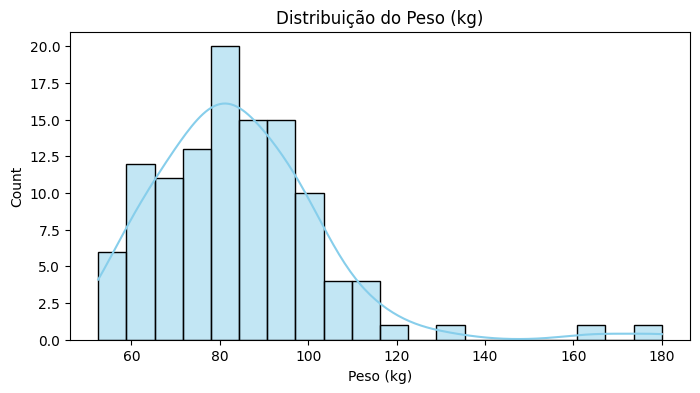

In [ ]:
# Distribuição do peso (target)
plt.figure(figsize=(8, 4))
sns.histplot(df['peso (kg)'], kde=True, bins=20, color='skyblue')
plt.title("Distribuição do Peso (kg)")
plt.xlabel("Peso (kg)")
plt.show()

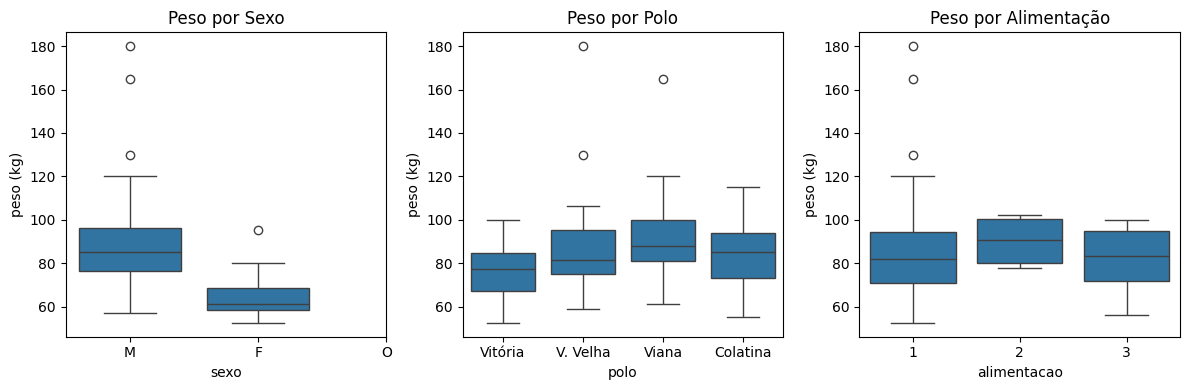

In [ ]:
# Boxplots por variáveis categóricas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='sexo', y='peso (kg)', data=df)
plt.title("Peso por Sexo")
plt.xticks([0, 1, 2], ['M', 'F', 'O'])

plt.subplot(1, 3, 2)
sns.boxplot(x='polo', y='peso (kg)', data=df)
plt.title("Peso por Polo")
plt.xticks([0, 1, 2, 3], ['Vitória', 'V. Velha', 'Viana', 'Colatina'])

plt.subplot(1, 3, 3)
sns.boxplot(x='alimentacao', y='peso (kg)', data=df)
plt.title("Peso por Alimentação")

plt.tight_layout()
plt.show()

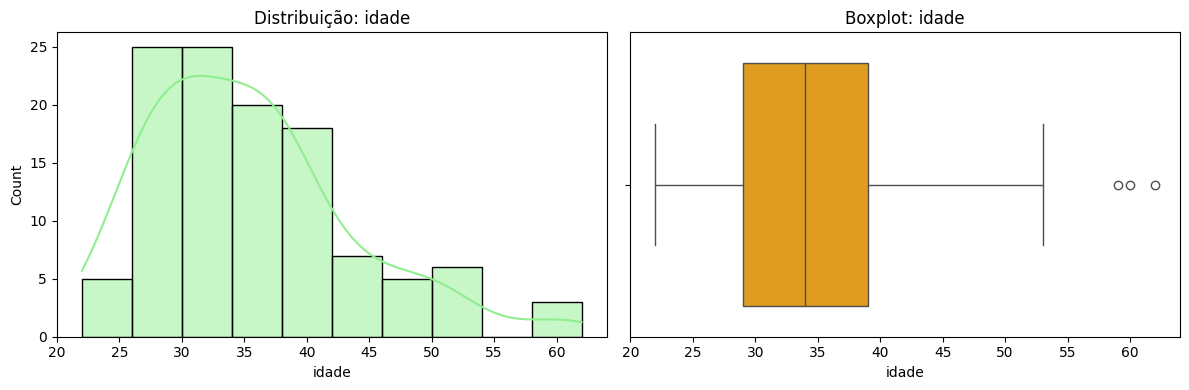

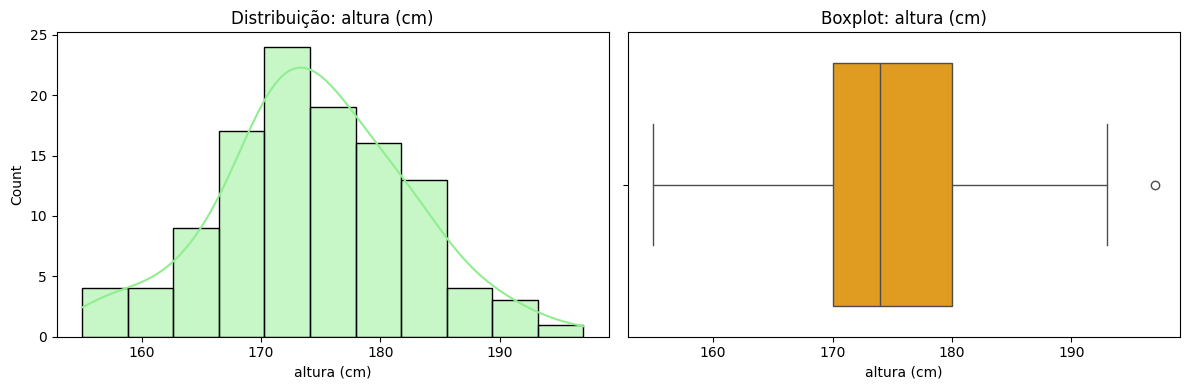

KeyboardInterrupt: 

In [ ]:
# Histograma + Boxplot para variáveis numéricas
numericas = ['idade', 'altura (cm)', 'sono_h', 'exercicio_dias', 'exercicio_min',
             'sedentario_h', 'agua_L', 'cafe_xic', 'refeicoes']

for col in numericas:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=ax[0], color='lightgreen')
    ax[0].set_title(f'Distribuição: {col}')

    sns.boxplot(x=df[col], ax=ax[1], color='orange')
    ax[1].set_title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()

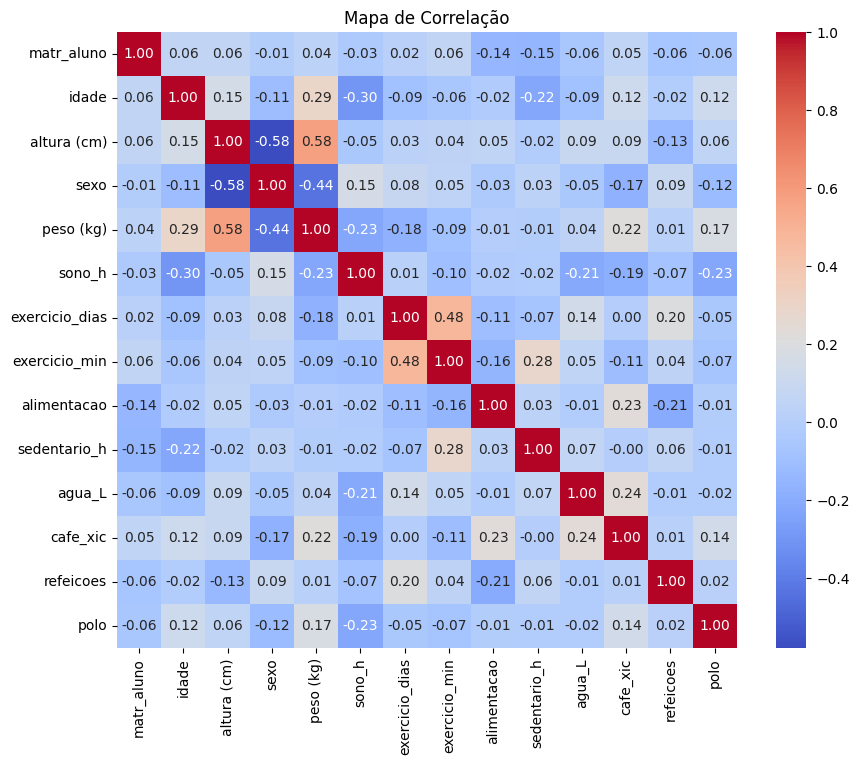

In [ ]:
# Mapa de correlação com destaque para peso
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

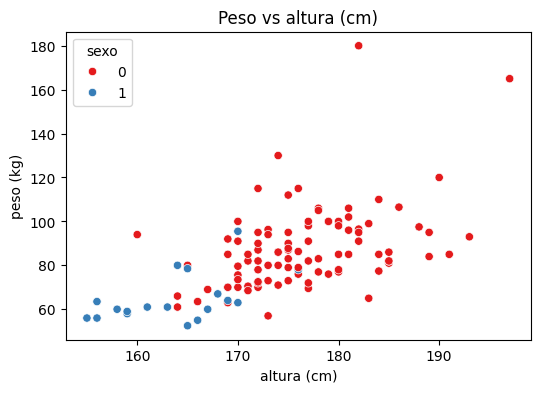

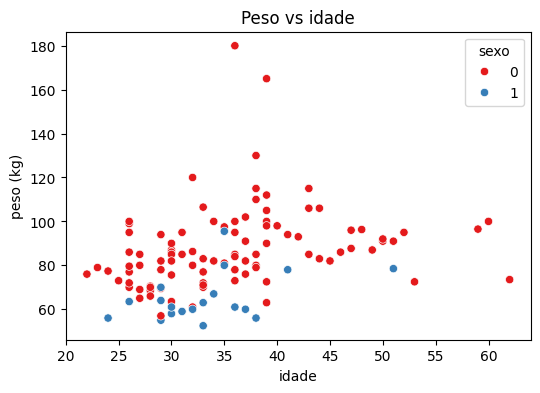

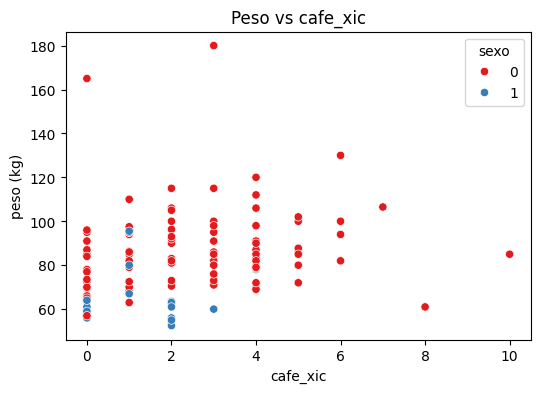

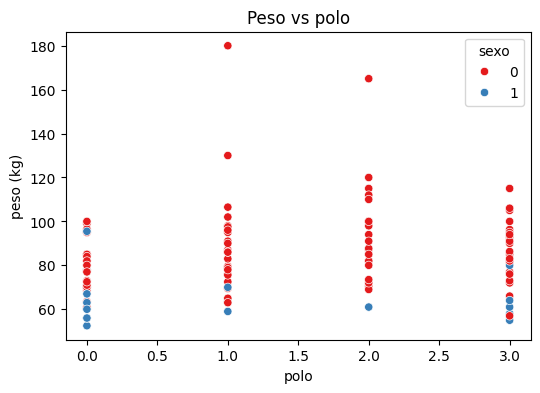

In [ ]:
# Gráficos de dispersão entre as variáveis mais correlacionadas com peso
variaveis_relevantes = correlacoes_peso.index[1:5]  # As 4 mais correlacionadas (exclui o próprio peso)

for var in variaveis_relevantes:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='peso (kg)', hue='sexo', palette='Set1')
    plt.title(f"Peso vs {var}")
    plt.show()

In [ ]:
# Correlação com a variável o target
correlacoes_peso = corr['peso (kg)'].sort_values(ascending=False)
print("\nCorrelação com o peso:")
print(correlacoes_peso)


Correlação com o peso:
peso (kg)         1.000000
altura (cm)       0.575690
idade             0.294193
cafe_xic          0.218614
polo              0.174203
agua_L            0.038483
matr_aluno        0.036911
refeicoes         0.013722
alimentacao      -0.005642
sedentario_h     -0.008590
exercicio_min    -0.089039
exercicio_dias   -0.176988
sono_h           -0.226799
sexo             -0.435671
Name: peso (kg), dtype: float64


##	Divisão dos dados e validação cruzada

In [ ]:
# Seleção das features e o target
X = df.drop(columns=['matr_aluno', 'peso (kg)'])  # Excluindo o ID e alvo
y = df['peso (kg)']

In [ ]:
# Dividir em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Resultados médios
print("🔎 Resultados com K-Fold (10 folds):")
print(f"  • MSE médio: {np.mean(mse_scores):.2f}")
print(f"  • R² médio: {np.mean(r2_scores):.2f}")

🔎 Resultados com K-Fold (10 folds):
  • MSE médio: 263.54
  • R² médio: 0.21


## Seleção de modelos e métricas de avaliação

In [ ]:
# Escolhendo os algoritmos: regressão linear, KNN e Random Forest
modelos = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Métricas escolhidas: MAE, MSE e R2
# Avaliação com K-Fold (10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

resultados = {}

for nome_modelo, modelo in modelos.items():
    mse_scores = []
    mae_scores = []
    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    resultados[nome_modelo] = {
        'MSE Médio': np.mean(mse_scores),
        'MAE Médio': np.mean(mae_scores),
        'R² Médio': np.mean(r2_scores)
    }

In [ ]:
# DataFrame com resultados para plot
df_resultados = pd.DataFrame(resultados).T
df_resultados

,MSE Médio,MAE Médio,R² Médio
Regressão Linear,263.541727,11.637187,0.207462
Árvore de Decisão,466.955629,14.953258,-0.629061
Random Forest,270.620848,11.350315,0.122338


## 	Ajuste dos modelos e otimização de hiperparâmetros

In [ ]:
# Ajuste de Hiperparâmetros com GridSearchCV
# Grid Search – Árvore de Decisão
parametros_dt = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=parametros_dt,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_dt.fit(X, y)

print("Melhores parâmetros - Árvore de Decisão:")
print(grid_dt.best_params_)

Melhores parâmetros - Árvore de Decisão:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Grid Search – Árvore de Decisão
parametros_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=parametros_rf,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(X, y)

print("Melhores parâmetros - Random Forest:")
print(grid_rf.best_params_)

Melhores parâmetros - Random Forest:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Avaliando os modelos com os melhores hiperparâmetros
melhor_dt = grid_dt.best_estimator_
melhor_rf = grid_rf.best_estimator_

for nome, modelo in zip(['Árvore de Decisão Otimizada', 'Random Forest Otimizada'], [melhor_dt, melhor_rf]):
    y_pred = modelo.predict(X)
    print(f"\nModelo: {nome}")
    print("MSE:", mean_squared_error(y, y_pred))
    print("MAE:", mean_absolute_error(y, y_pred))
    print("R² :", r2_score(y, y_pred))


Modelo: Árvore de Decisão Otimizada
MSE: 228.8048028476989
MAE: 10.7582120518688
R² : 0.3962033308280968

Modelo: Random Forest Otimizada
MSE: 66.86248213097713
MAE: 5.197690332091258
R² : 0.8235555219960895


## Resultados Finais

### 🔍 Análise dos gráficos

Altura vs Peso: Correlação forte e positiva. Pessoas mais altas tendem a pesar mais. A altura é a melhor variável preditora para o peso, com grande impacto no modelo.

Idade vs Peso: Correlação fraca e dispersa. Embora possa ser incluída no modelo, não parece ter grande impacto isolado.

Sono vs Peso: Distribuição dispersa e sem relação forte. Possivelmente irrelevante para a predição direta.

Sedentarismo vs Peso: Correlação fraca ou nula. Pode ser relevante em interações, mas não sozinha.

Exercício vs Peso: Há uma tendência leve (mais exercícios, menor peso), mas com outliers. Pode ser relevante como moderador, mas não linearmente.

Água vs Peso: Tendência fraca e confusa. Pode não ser relevante para uma regressão direta.

Sexo vs Peso: O sexo tem uma influência significativa, com a média de peso dos homens sendo visivelmente maior que das mulheres. A correlação negativa (r = -0.43) confirma que sexo pode ser uma variável importante no modelo de regressão.

Polo vs Peso: As diferenças entre polos são pequenas e com baixa correlação (r = 0.17). Embora tenha alguma variação, o polo tem pouca influência sobre o peso e não deve ter grande impacto preditivo no modelo.

A altura é a principal variável preditora do peso. Outras variáveis como sexo, exercício, e idade podem contribuir, mas com menor impacto. Variáveis como sono, sedentarismo, água e polo têm pouco impacto isoladamente, mas podem ser relevantes em interações ou em modelos mais complexos.

### Desempenho dos modelos
Regressão Linear:

MSE: 263.54, o que sugere erros moderados (~16.25). Pode ser melhorado com ajustes no modelo.

MAE: 11.64, indicando que o modelo erra em média 11.64 kg nas previsões do peso.

R²: 0.207, explicando apenas 20.7% da variação no peso. O modelo não captura bem as relações dos dados.

Árvore de Decisão:

MSE: 466.96, mais alto que o da regressão linear, indicando erros maiores.

MAE: 14.95, sugerindo um erro médio maior nas previsões de peso.

R²: -0.629, desempenho pior que a média dos valores, indicando overfitting ou modelagem inadequada.

Random Forest:

MSE: 270.62, semelhante ao da regressão linear, com erro moderado e mais robusto.

MAE: 11.35, mais preciso que a Árvore de Decisão.

R²: 0.122, muito baixo, indicando que o modelo não está capturando bem a complexidade dos dados.

Conclusão:
A Regressão Linear se destaca como o melhor modelo, com erro controlado, mas ainda precisando de ajustes.

A Árvore de Decisão apresenta os piores resultados, provavelmente devido ao overfitting.

A Random Forest tem desempenho melhor que a Árvore de Decisão, mas ainda não explica bem a variabilidade dos dados.

### Resultados dos Modelos Otimizados
Árvore de Decisão Otimizada:

MSE: 228.80, um erro mais baixo comparado ao modelo anterior, indicando melhorias nas previsões.

MAE: 10.76, erro médio de aproximadamente 10.76 kg, o que também é uma melhoria.

R²: 0.396, agora o modelo explica 39.6% da variabilidade dos dados, um aumento significativo em relação ao modelo anterior.

Random Forest Otimizada:

MSE: 66.86, um erro muito baixo, indicando previsões mais precisas.

MAE: 5.20, erro médio de apenas 5.20 kg, excelente precisão.

R²: 0.824, com o modelo explicando 82.4% da variabilidade dos dados, mostrando um desempenho muito bom.

Conclusão:
A Random Forest Otimizada apresenta o melhor desempenho, com um MSE muito baixo e um R² de 0.824, indicando que o modelo está explicando a maior parte da variabilidade dos dados. A Árvore de Decisão Otimizada também teve melhorias, com um R² de 0.396, mas ainda está atrás da Random Forest em termos de precisão e capacidade explicativa.